In [197]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import copy

In [198]:
# Фитнес функция 
# f(x1,x2)=(x1+2*-x2+3)^2 + (2*x1+x2-8)^2
def fitness_function(x1,x2):
  f1=x1+2*-x2+3
  f2=2*x1+x2-8
  r = f1**2+f2**2
  return r

In [199]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
  # Инициализация массива скоростей
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Случайно генерируем веса по нормальному распределения
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  c1 = c
  c2 = c
  # Вычисляем новую скорость
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

In [200]:
def update_position(particle, velocity):
  # Перемещаем частицы
  new_particle = particle + velocity
  return new_particle

In [233]:
def pso(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Инициализация
  # Популяция
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Лучшея позиция частицы
  pbest_position = particles
  # Fitness
  pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
  # Индекс лучшей частицы
  gbest_index = np.argmin(pbest_fitness)
  # Глобальная лучшая позиция частицы
  gbest_position = pbest_position[gbest_index]
  # Скорость (сначиная со скорости 0)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]
  # массив частиц за одно поколение (чтобы потом выводить на график по поколения как менялось )  
  particles_for_generation = []
  # Цикл по количеству поколений
  for t in range(generation):
    # Остановиться если значение фитнес функции достигло предопределенного критерия успеха
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Обновить скорость каждой частицы
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Переместить частицу в новую позицию
        particles[n] = update_position(particles[n], velocity[n])
      #copy.deepcopy использовалась потому что иначе видимо из-за ссылочного типа данных значения перехаписывались в массиве
      particles_for_generation.append(copy.deepcopy(particles))
    # Рассчитать значение фитнес функции
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Находим индекс лучшей частицы
    gbest_index = np.argmin(pbest_fitness)
    # Обновляем позицию лучшей частицы
    gbest_position = pbest_position[gbest_index]

  # Печать результатов
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)

  return particles_for_generation

In [234]:
  population = 100
  dimension = 2
  position_min = -100.0
  position_max = 100.0
  generation = 40
  fitness_criterion = 10e-4
  particles= pso(population, dimension, position_min, position_max, generation, fitness_criterion)

Global Best Position:  [2.59808475 2.80429252]
Best Fitness Value:  0.00011046963702933903
Average Particle Best Fitness Value:  0.6197459419114338
Number of Generation:  39


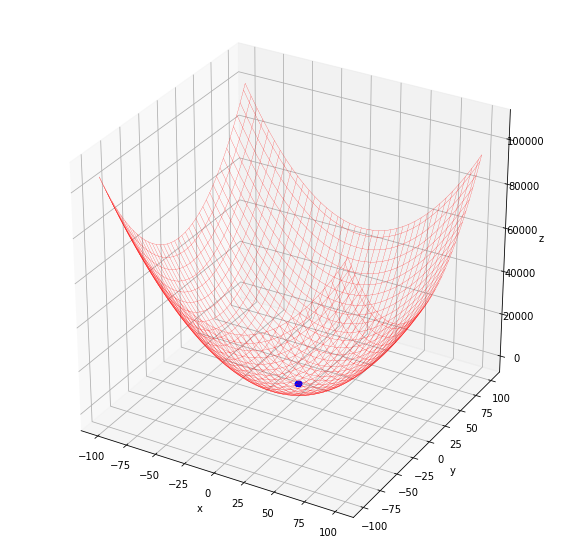

In [238]:
# Подготовка графика
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x = np.linspace(position_min, position_max, 80)
y = np.linspace(position_min, position_max, 80)
X, Y = np.meshgrid(x, y)
Z= fitness_function(X,Y)
ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

# Хранит изображение
images = []

# Добавление изображения для каждого поколения
for t in range(len(particles)):
  image = ax.scatter3D([
                          particles[t][n][0] for n in range(population)],
                         [particles[t][n][1] for n in range(population)],
                         [fitness_function(particles[t][n][0],particles[t][n][1]) for n in range(population)], c='b') 
  images.append([image])
# Сгенерировать изображение и сохранить
animated_image = animation.ArtistAnimation(fig, # фигура, где отображается анимация
    images,              # кадры
    interval=60,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=True)       # зацикливать ли анимацию
# Потом нужно отдельно вызвать эту гиф, чтобы показать анимацию
animated_image.save('/content/pso_simple.gif', writer='pillow') 

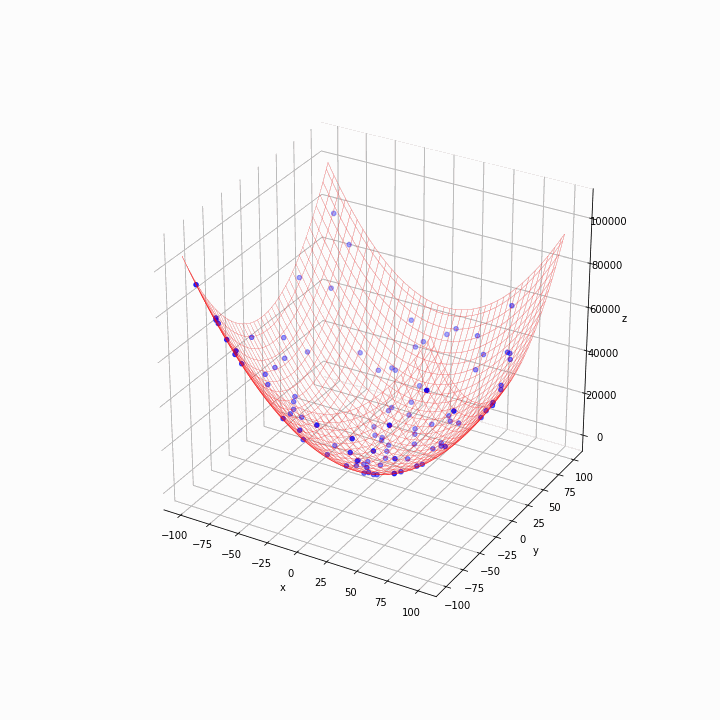

In [241]:
from IPython.display import Image

fname = '/content/pso_simple.gif'
Image(open(fname, 'rb').read())